In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)

In [2]:
df = pd.read_csv('gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
df.shape

(2290, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df_copy = df.copy(deep = True)
df_copy[['SPX','GLD','USO','SLV','EUR/USD']]=df_copy[['SPX','GLD','USO','SLV','EUR/USD']].replace(0,np.NaN)
df_copy.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
df2 = df.drop(columns=['Date'])
df2

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


<Axes: >

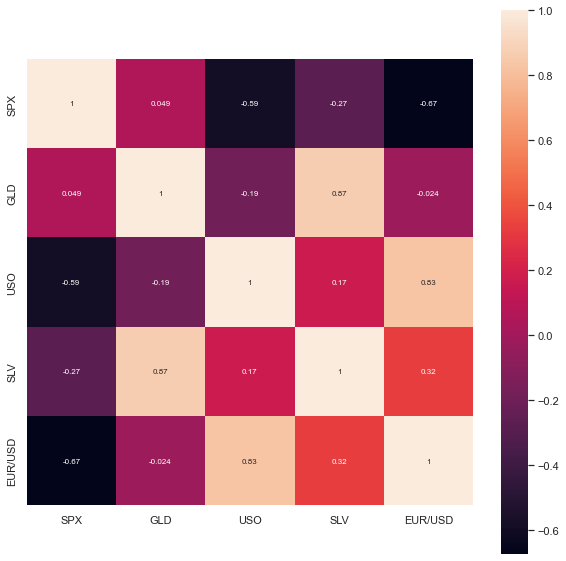

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(df2.corr(), cbar=True, square=True, fmt='.2g',annot=True, annot_kws={'size':8})

In [9]:
print(df2.corr()['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


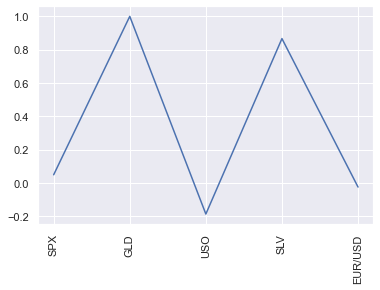

In [10]:
corr = df2.corr()['GLD']
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='GLD', ylabel='Count'>

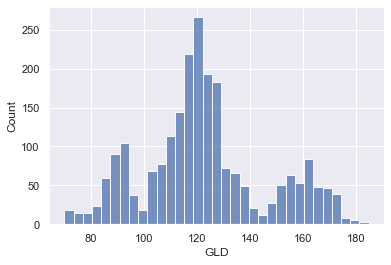

In [11]:
sns.histplot(df2['GLD'])

In [12]:
X = df.drop(['Date','GLD'],axis=1)
y = df2['GLD']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
from sklearn import metrics
import math
y_pred = lr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 6.112232362039995
MSE is 75.61760337571626
R2 score is 0.8530125466873726
RMSE score is 8.695838279068687


In [16]:
print(y_pred)

[123.98848593 118.72378251 167.93606115 120.95436259  99.21717356
 144.02529592 124.67311428 110.13821112 141.54851656 112.72560268
 111.54377778 121.35708494  93.49049388 147.6748059  122.63969844
 116.10244133  90.60661708  95.35006004  96.66645999 118.82627648
  81.60264838 117.91750553 122.77642737 178.41886439 176.56878873
 168.34551312 116.52082679 152.28582212 127.54557366 114.04700448
 119.55473983 110.83848323 122.99531195 121.73588562 103.71146331
 119.21211118  79.60997141 116.49826558 121.95644975 168.72701664
 105.49918083 138.32748196 106.18627828 145.37064875 140.02375833
 164.0243989  120.32830363 149.68919512 150.22543017 122.59211062
 116.67934117 109.65206461 117.1944928  111.54297982 141.54106078
 116.94847011 115.15348417  87.85821683 143.81260282 120.75611118
  94.99871761 116.54566195  80.05652276 197.17633914 118.68188095
 123.44303885 120.54652106 112.79766237 159.17626719 123.25040807
 120.76099589 177.98361242 115.06617629 161.92975464 112.01850778
 128.44380

In [17]:
y_test = list(y_test)

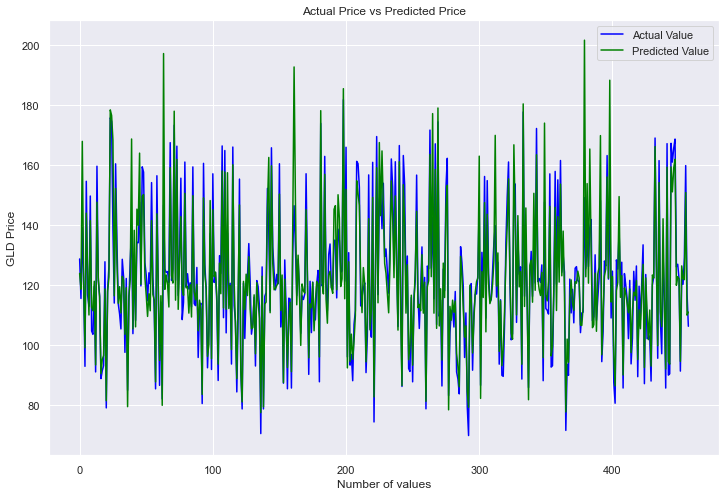

In [18]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [20]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1.4171618624454145
MSE is 7.281081425782652
R2 score is 0.9858468455973128
RMSE score is 2.698347906735277


In [21]:
y_test = list(y_test)

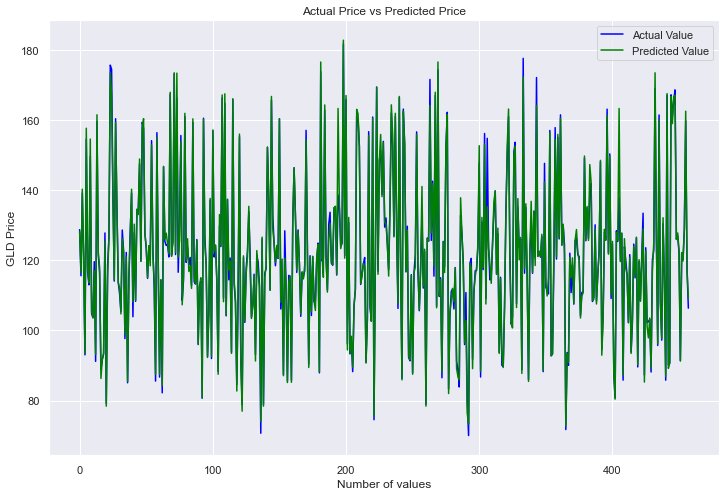

In [22]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [23]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [24]:
from sklearn import metrics
import math
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 4.657993266510593
MSE is 31.468396018613436
R2 score is 0.9388309178799678
RMSE score is 5.60966986716807


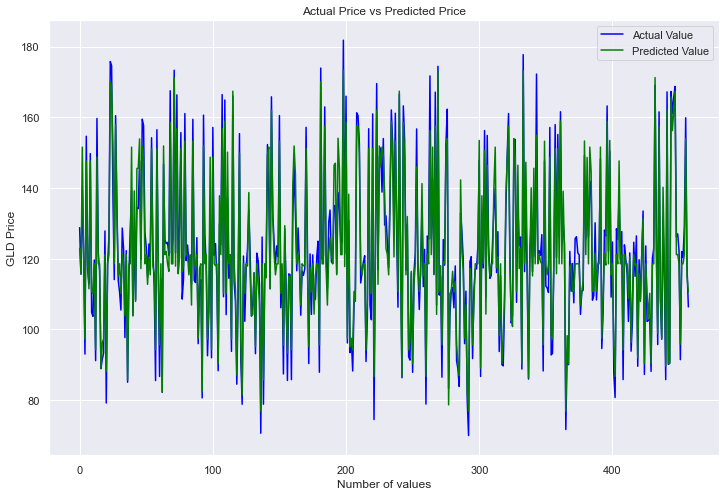

In [25]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [27]:
from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1.297793151724892
MSE is 5.16257387057774
R2 score is 0.9899648553789232
RMSE score is 2.272129809358994


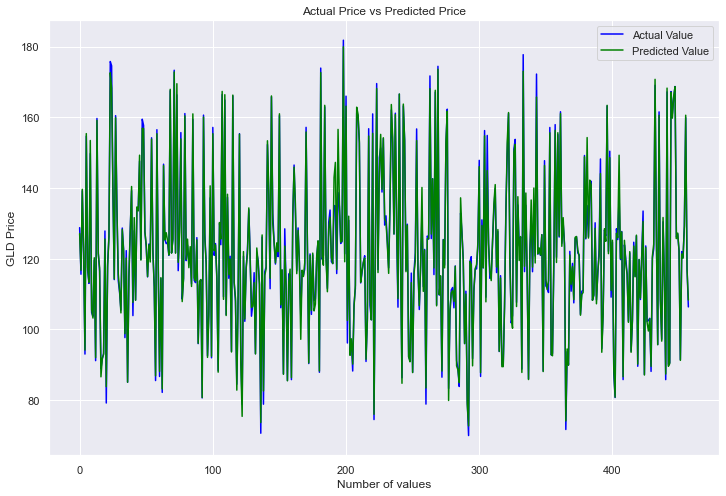

In [28]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()